In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random
# networks will not be random but the random module will be used to create transaction ID's

In [267]:
# data source: https://snap.stanford.edu/data/soc-sign-bitcoin-otc.html
trades = pd.read_csv("soc-sign-bitcoinotc.csv", names=['SOURCE', 'TARGET', 'RATING', 'TIME'])

In [268]:
print('shape:', trades.shape)
print('columns:', trades.columns)
print('basic info:', trades.info())

shape: (35592, 4)
columns: Index(['SOURCE', 'TARGET', 'RATING', 'TIME'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35592 entries, 0 to 35591
Data columns (total 4 columns):
SOURCE    35592 non-null int64
TARGET    35592 non-null int64
RATING    35592 non-null int64
TIME      35592 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.1 MB
basic info: None


In [269]:
# create column showing tuples of transactions
trades['from_to'] = list(trades[['SOURCE', 'TARGET']].itertuples(index=False, name=None))

In [270]:
# create column with transaction ID's;  ID's are 6-digits and begin with 4
transaction_ids = []
for a in range(0, trades.shape[0]):
    a = random.randint(10000, 100000)
    a = int(str('4') + str(a))
    transaction_ids.append(a)

In [271]:
trades['transaction_id'] = transaction_ids

In [272]:
d = {}
ID = []
for id in transaction_ids:
    d['ID'] = id
    ID.append(d.copy())

In [273]:
trades['ID'] = ID

In [274]:
trades['to_from_ID'] = list(trades[['SOURCE', 'TARGET', 'ID']].itertuples(index=False, name=None))

In [275]:
trades.head()

,SOURCE,TARGET,RATING,TIME,from_to,transaction_id,ID,to_from_ID
0,6,2,4,1.289242e+09,"(6, 2)",425116,{'ID': 425116},"(6, 2, {'ID': 425116})"
1,6,5,2,1.289242e+09,"(6, 5)",472350,{'ID': 472350},"(6, 5, {'ID': 472350})"
2,1,15,1,1.289243e+09,"(1, 15)",426239,{'ID': 426239},"(1, 15, {'ID': 426239})"
3,4,3,7,1.289245e+09,"(4, 3)",437924,{'ID': 437924},"(4, 3, {'ID': 437924})"
4,13,16,8,1.289254e+09,"(13, 16)",425102,{'ID': 425102},"(13, 16, {'ID': 425102})"


In [276]:
df1 = trades[0:100]

In [277]:
# create single list of all nodes in the SOURCE and TARGET columns
source_unique = df1['SOURCE'].unique()
target_unique = df1['TARGET'].unique()
nodes_list = []
nodes_list.extend(source_unique)
nodes_list.extend(target_unique)
nodes_list = list(set(nodes_list))

In [278]:
print(nodes_list)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 15, 16, 17, 19, 20, 21, 23, 25, 26, 28, 29, 31, 32, 34, 35, 36, 37, 39, 41, 44, 45, 46, 47, 51, 52, 53, 54, 55]


In [279]:
G1 = nx.DiGraph()

In [289]:
G1.add_nodes_from(nodes_list)

In [290]:
G1.add_edges_from(df1['from_to'])

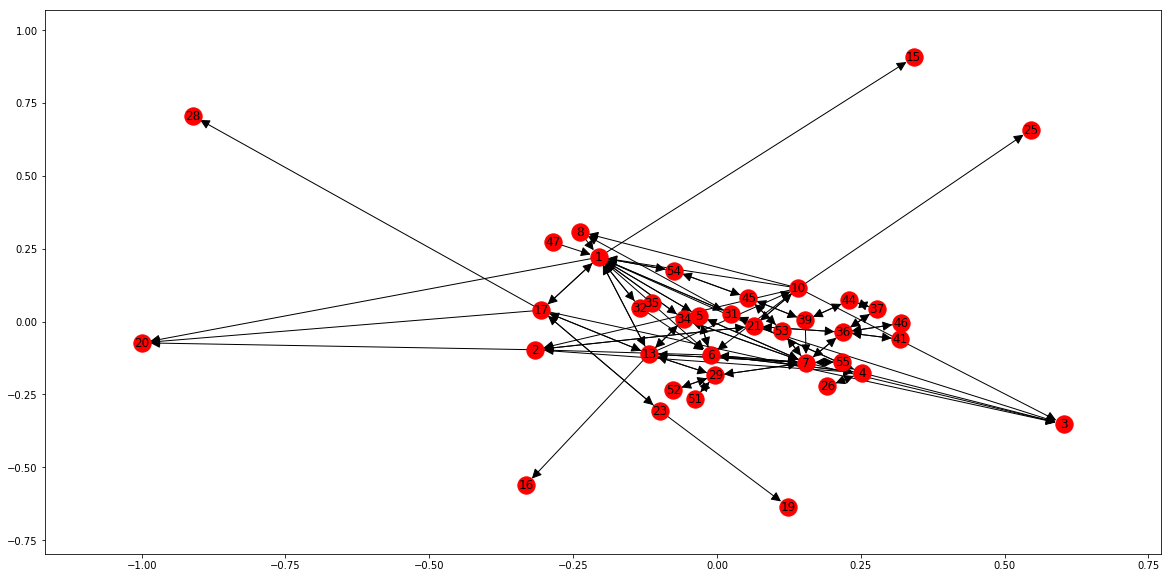

In [291]:
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G1)
nx.draw_networkx(G1, pos, arrowsize=20)
plt.show()

In [292]:
# let's have a look at the transactions that node 17 sent and received in the first hundred transactions:
df1.query("SOURCE == 17 | TARGET == 17")

,SOURCE,TARGET,RATING,TIME,from_to,transaction_id,ID,to_from_ID
14,17,3,5,1.289442e+09,"(17, 3)",416730,{'ID': 416730},"(17, 3, {'ID': 416730})"
15,17,23,1,1.289490e+09,"(17, 23)",480751,{'ID': 480751},"(17, 23, {'ID': 480751})"
32,17,28,1,1.289836e+09,"(17, 28)",451787,{'ID': 451787},"(17, 28, {'ID': 451787})"
33,17,13,2,1.289873e+09,"(17, 13)",417131,{'ID': 417131},"(17, 13, {'ID': 417131})"
34,13,17,2,1.289874e+09,"(13, 17)",427246,{'ID': 427246},"(13, 17, {'ID': 427246})"
37,17,20,2,1.290108e+09,"(17, 20)",470079,{'ID': 470079},"(17, 20, {'ID': 470079})"
52,1,17,9,1.290969e+09,"(1, 17)",491966,{'ID': 491966},"(1, 17, {'ID': 491966})"
60,17,1,9,1.291218e+09,"(17, 1)",492426,{'ID': 492426},"(17, 1, {'ID': 492426})"
70,23,17,1,1.291624e+09,"(23, 17)",494014,{'ID': 494014},"(23, 17, {'ID': 494014})"


In [293]:
# In the diagram it appears that node 3 was on the strictly on the receiving end in the first 100 transactions:
df1.query("SOURCE == 3 | TARGET == 3")

,SOURCE,TARGET,RATING,TIME,from_to,transaction_id,ID,to_from_ID
3,4,3,7,1.289245e+09,"(4, 3)",437924,{'ID': 437924},"(4, 3, {'ID': 437924})"
13,21,3,7,1.289442e+09,"(21, 3)",444614,{'ID': 444614},"(21, 3, {'ID': 444614})"
14,17,3,5,1.289442e+09,"(17, 3)",416730,{'ID': 416730},"(17, 3, {'ID': 416730})"
22,10,3,7,1.289556e+09,"(10, 3)",412171,{'ID': 412171},"(10, 3, {'ID': 412171})"
88,7,3,6,1.292200e+09,"(7, 3)",455404,{'ID': 455404},"(7, 3, {'ID': 455404})"


In [367]:
# this can also be shown using the following methods:
print(list(G1.predecessors(3)))
print(list(G1.successors(3)))

[4, 21, 17, 10, 7]
[]


In [376]:
# next we will use the same data to draw a multigraph
G2 = nx.MultiGraph()

In [377]:
G2.add_nodes_from(nodes_list)

In [378]:
G2.add_edges_from(df1['to_from_ID'])
G2[4]

AdjacencyView({3: {0: {'ID': 437924}}, 26: {0: {'ID': 449035}, 1: {'ID': 470085}}, 6: {0: {'ID': 485016}, 1: {'ID': 434719}}, 2: {0: {'ID': 498119}}, 31: {0: {'ID': 424978}, 1: {'ID': 477738}}})

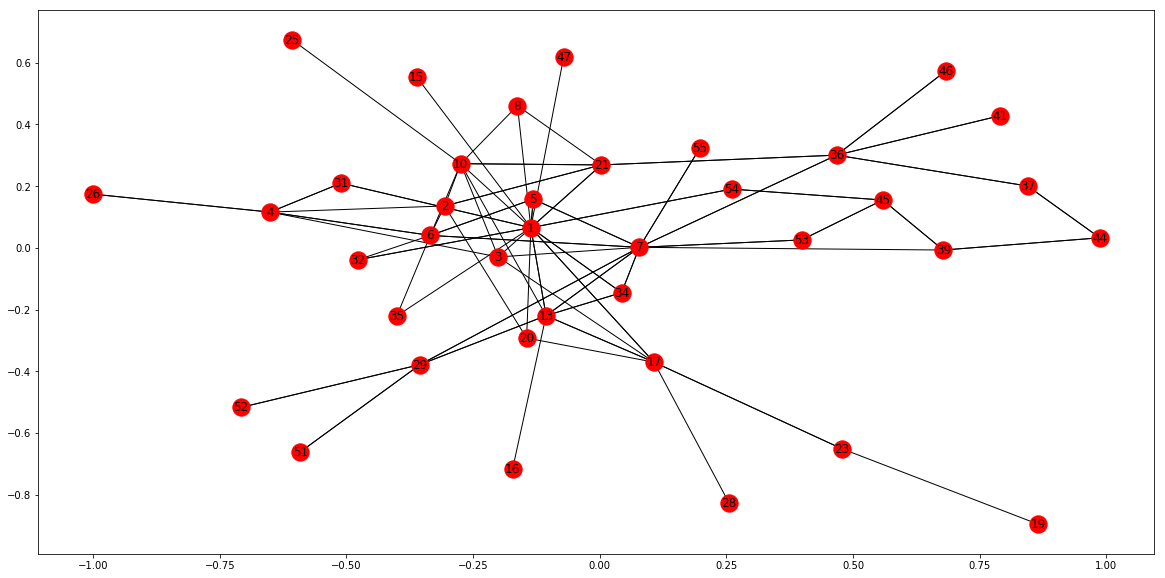

In [379]:
plt.figure(figsize=(20, 10))
nx.draw_networkx(G2)